<a href="https://colab.research.google.com/github/gabitza-tech/IMSAR/blob/main/GMM_EM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas import DataFrame 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [15]:
import imageio
import matplotlib.animation as ani
import matplotlib.cm as cmx
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Ellipse
from PIL import Image
from sklearn import datasets
from sklearn.cluster import KMeans

In [16]:
raw_df = pd.read_csv('/content/adult.csv')
raw_df = raw_df.drop('income', axis = 1) 
features_string=["workclass",  "education",  "marital-status", "occupation", "relationship", "race", "gender", "native-country"]

raw_df = raw_df.replace('?', np.NaN)
raw_df.fillna(method ='ffill', inplace = True) 

print(raw_df)

       age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18       Private  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishin

In [17]:
labelEncoder = LabelEncoder()
for feature in features_string:
  print(feature)
  labelEncoder.fit(raw_df[feature])
  raw_df[feature] = labelEncoder.transform(raw_df[feature])

print(raw_df)

workclass
education
marital-status
occupation
relationship
race
gender
native-country
       age  workclass  fnlwgt  education  educational-num  marital-status  \
0       25          3  226802          1                7               4   
1       38          3   89814         11                9               2   
2       28          1  336951          7               12               2   
3       44          3  160323         15               10               2   
4       18          3  103497         15               10               4   
...    ...        ...     ...        ...              ...             ...   
48837   27          3  257302          7               12               2   
48838   40          3  154374         11                9               2   
48839   58          3  151910         11                9               6   
48840   22          3  201490         11                9               4   
48841   52          4  287927         11                9          

In [7]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(raw_df) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

,P1,P2
0,0.398738,-0.100271
1,-0.651915,-0.244399


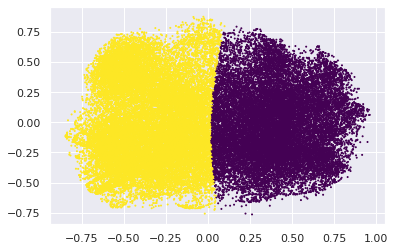

In [36]:
from sklearn.mixture import GaussianMixture 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

gmm = GaussianMixture(n_components=2).fit(X_principal)
labels = gmm.predict(X_principal)
plt.scatter(X_principal.iloc[:, 0], X_principal.iloc[:, 1], c=labels, cmap='viridis', s=1);

In [39]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 2):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, s=0.5, cmap='viridis', zorder=2)
    else:
        ax.scatter(X.iloc[:, 0], X.iloc[:, 1], s=0.5, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

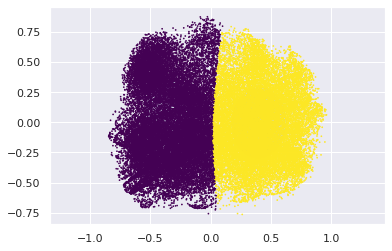

In [40]:
plot_gmm(gmm, X_principal)